In [1]:
import sys
sys.path.append('../')
import networkx as nx
from smodels.theory.auxiliaryFunctions import stringToGraph, fromTreeToList, getTreeRoot
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from smodels.theory.element import Element

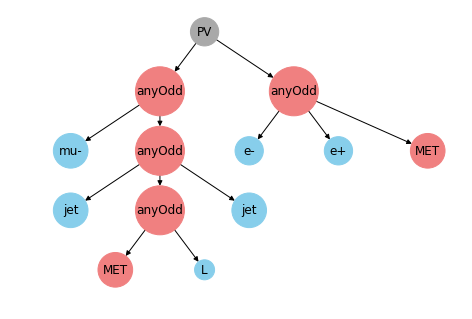

In [2]:
elementStr = "[[['e+','e-']],[['mu-'],['jet','jet'],['L']]]"
el = Element(info=elementStr)
el.drawTree()

In [3]:
print(el)

PV->(anyOdd,anyOdd),anyOdd->(mu-,anyOdd),anyOdd->(e-,e+,MET),anyOdd->(jet,jet,anyOdd),anyOdd->(MET,L)


In [9]:
def getList(T,node=None):
    """
    Recursively compute the canonical name for the Tree T.
    Returns the name in integer form.
    
    :param T: Tree (networkX DiGraph object)
    :param node: Node to get the name for. If None, it will use the root
    
    :return: Integer representing the Tree
    """
    
    if not isinstance(T,nx.DiGraph):
        raise SModelSError("Input must be a DiGraph object.")
    
    if node is None:
        node = getTreeRoot(T)

    children = list(T[node])
    if not children:
        return T.nodes[node]['particle']
    else:
        tp = sorted([getList(T,n) for n in children if T.nodes[n]['particle'].Z2parity == 'even'])
        return tp
    
# def fromBranchToL(T,node):
    
#     if not isinstance(T,nx.DiGraph):
#         raise SModelSError("Input must be a DiGraph object.")
    
#     children = list(T[node])
#     bList = [fromVertexToL(n) for ]


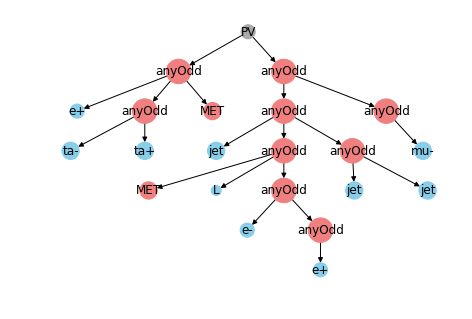

In [10]:
elementStr = "[[['e+',['ta+','ta-']]],[[['mu-']],['jet',['jet','jet']],['L',['e-',['e+']]]]]"
el = Element(info=elementStr)
el.drawTree(nodeScale=1)

In [13]:
print(fromTreeToList(el.tree))

[[[mu-], [[jet, jet], jet, [[[e+], e-], L]]], [[ta+, ta-], e+]]


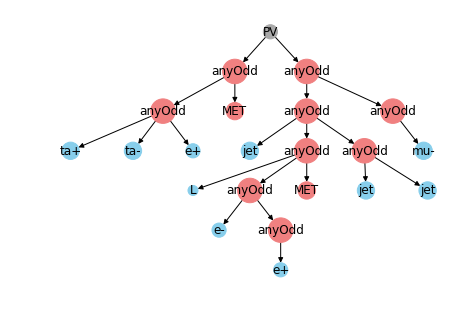

In [14]:
elementStr = "[[[['ta+','ta-'],'e+']],[[['mu-']],['jet',['jet','jet']],['L',['e-',['e+']]]]]"
el = Element(info=elementStr)
el.drawTree(nodeScale=1)

In [15]:
print(fromTreeToList(el.tree))

[[[mu-], [[jet, jet], jet, [[[e+], e-], L]]], [[e+, ta+, ta-]]]


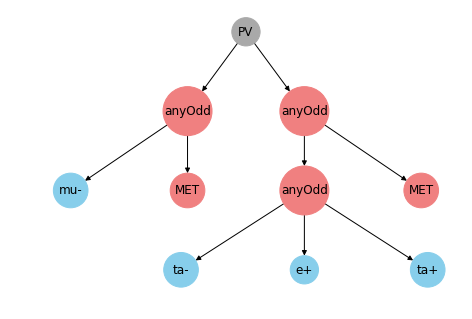

In [16]:
elementStr = "[[[['ta+','ta-'],'e+']],[['mu-']]]"
g = stringToGraph(elementStr)
el = Element(info=g)
el.drawTree()

[[mu-], [[e+, ta+, ta-]]]
